In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import plotly
from scipy.io import loadmat

In [29]:
data=loadmat('machine-learning-ex4\ex4\ex4data1.mat')
weights=loadmat('machine-learning-ex4\ex4\ex4weights.mat')

In [31]:
X=data['X']
y=data['y']
theta1=weights['Theta1']
theta2=weights['Theta2']

In [15]:
print("X",X.shape,'y',y.shape)

X (5000, 400) y (5000, 1)


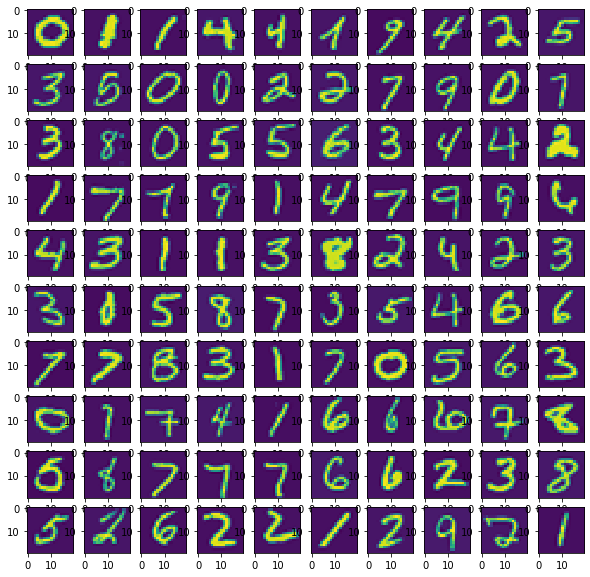

In [20]:
#visualize 
fig,ax =plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order='F'))
plt.show()

In [238]:
#define the parameters
inputsize=400
hiddensize=25
outputlabels=10
nn_params=np.hstack((theta1.ravel(order='F'),theta2.ravel(order='F')))
lmbda=1

In [239]:
def costfunction(nn_params,inputsize,hiddensize,outputlabels,X,y,lmbda):
    theta1=np.reshape(nn_params[:(inputsize+1)*(hiddensize)],(hiddensize,inputsize+1),order='F')
    theta2=np.reshape(nn_params[(inputsize+1)*(hiddensize):],(outputlabels,hiddensize+1),order='F')
    a1=X
    m=len(y)
    ones=np.ones([m,1])
    a1=np.hstack((ones,a1))
    z2=np.dot(a1,theta1.T)
    a2=sigmoid(z2)
    a2=np.hstack((ones,a2))
    z3=np.dot(a2,theta2.T)
    a3=h=sigmoid(z3)
    
    y_d = pd.get_dummies(y.flatten())

    temp1=np.multiply(y_d,np.log(h))
    temp2=np.multiply((1-y_d),np.log(1-h))
    temp3=np.sum(temp1+temp2)
    sum1=np.sum(np.sum(np.power(theta1[:,1:],2),axis=1))
    sum2=np.sum(np.sum(np.power(theta2[:,1:],2),axis=1))
    return np.sum(temp3/(-m))+(lmbda/(2*m)*(sum1+sum2))

In [393]:
costfunction(nn_params,inputsize,hiddensize,outputlabels,X,y,lmbda)

6.94243282619616

In [269]:
def randweights(L_in,L_out):
    #epsilon=(np.sqrt(6)/np.sqrt(L_in+L_out))
    epsilon=0.12
    print(epsilon)
    return np.random.rand(L_out,L_in+1)*2*epsilon-epsilon


In [270]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [353]:
def sigmgrad(X):
    return np.multiply(sigmoid(X),(1-sigmoid(X)))

In [273]:
initialtheta1=randweights(inputsize,hiddensize)
initialtheta2= randweights(hiddensize,outputlabels)
nn_parmas=np.hstack((np.ravel(theta1,order='F'),np.ravel(theta2,order='F')))

0.12
0.12


In [370]:
#back propogation
initialtheta1= np.reshape(nn_params[:hiddensize*(inputsize+1)],(hiddensize,inputsize+1),'F')
initialtheta2=np.reshape(nn_params[hiddensize*(inputsize+1):],(outputlabels,hiddensize+1),'F')
y_d=pd.get_dummies(y.flatten())
delta1=np.zeros(initialtheta1.shape)
delta2=np.zeros(initialtheta2.shape)

In [288]:
print(X.shape,theta1.shape,theta2.shape)

(5000, 400) (25, 401) (10, 26)


In [394]:
def nngrad(nn_params,inputsize,hiddensize,outputlabels,X,y,lmbda):    
    initialtheta1= np.reshape(nn_params[:hiddensize*(inputsize+1)],(hiddensize,inputsize+1),'F')
    initialtheta2=np.reshape(nn_params[hiddensize*(inputsize+1):],(outputlabels,hiddensize+1),'F')
    y_d=pd.get_dummies(y.flatten())
    delta1=np.zeros(initialtheta1.shape)
    delta2=np.zeros(initialtheta2.shape)
    m=len(y)
    for i in range(m):
        ones=np.ones(1)
        a1=np.hstack((ones,X[i]))
        z2=a1@initialtheta1.T
        a2=np.hstack((ones,sigmoid(z2)))
        z3=a2@initialtheta2.T
        a3=sigmoid(z3)

        #error terms
        d3=a3-y_d.iloc[i,:][np.newaxis,:]
        z2=np.hstack((ones,z2))
        d2=np.multiply(initialtheta2.T@d3.T,sigmgrad(z2).T[:,np.newaxis])

        #update delta

        delta1=delta1+d2[1:,:]@a1[np.newaxis,:]
        delta2=delta2+d3.T@a2[np.newaxis,:]

    delta1=delta1/m
    delta2=delta2/m

    #print(delta1.shape,delta2.shape)

    delta1[:,1:]=delta1[:,1:]+initialtheta1[:,1:]*lmbda/m
    delta2[:,1:]=delta2[:,1:]+initialtheta2[:,1:]*lmbda/m
    return np.hstack((delta1.ravel(order='F'),delta2.ravel(order='F')))

In [382]:
d2[1:,:].shape,a1[np.newaxis,:].shape,delta1.shape

((25, 1), (1, 401), (25, 401))

In [381]:
z2.shape,a1.shape,initialtheta1.shape

((26,), (401,), (25, 401))

temp1

In [396]:
nn_prams=nngrad(nn_params,inputsize,hiddensize,outputlabels,X,y,lmbda)

(25, 401) (10, 26)


In [397]:
costfunction(nn_params,inputsize,hiddensize,outputlabels,X,y,lmbda)

6.94243282619616

In [399]:
#now optimize 

theta_opt=opt.fmin_cg(maxiter=50,f=costfunction,x0=nn_params,fprime=nngrad,args=(inputsize,hiddensize,outputlabels,X,y.flatten(),lmbda))

(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (10, 26)
(25, 401) (1

In [400]:
costfunction(theta_opt,inputsize,hiddensize,outputlabels,X,y,lmbda)

0.4310422686626698

In [ ]:
def predict(theta1,theta2,X,y)

In [402]:
theta_opt.shape

(10285,)

In [414]:
theta1=np.reshape(theta_opt[:hiddensize*(inputsize+1)],(hiddensize*(inputsize+1)),'F')
theta2=np.reshape(theta_opt[hiddensize*(inputsize+1):],(outputlabels,(hiddensize+1)),'F')

In [426]:
def predict(theta1,theta2,X,y):
    m=len(y)
    ones=np.ones((m,1))
    a1=np.hstack((ones,X))
    z2=a1@initialtheta1.T
    a2=np.hstack((ones,sigmoid(z2)))
    z3=a2@initialtheta2.T
    a3=sigmoid(z3)
    return np.argmax(a3,axis=1)+1

In [429]:
pred=predict(theta1,theta2,X,y)
np.mean(pred==y.flatten())

0.9752

In [ ]:
def gradientcheck(andrew)